# 6. PyTorch Basics - Datasets and Dataloaders

### About this notebook

This notebook was used in the 50.039 Deep Learning course at the Singapore University of Technology and Design.

**Author:** Matthieu DE MARI (matthieu_demari@sutd.edu.sg)

**Version:** 1.2 (22/06/2023)

**Requirements:**
- Python 3 (tested on v3.11.4)
- Matplotlib (tested on v3.7.1)
- Numpy (tested on v1.24.3)
- Pandas (tested on v2.0.2)
- Torch (tested on v2.0.1+cu118)
- Torchvision (tested on v0.15.2+cu118)

### Imports and CUDA

In [1]:
# Matplotlib
import matplotlib.pyplot as plt
# Numpy
import numpy as np
# Pandas
import pandas as pd
# Torch
import torch
import torchvision
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor

In [2]:
# Use GPU if available, else use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


### Built-in datasets

Pytorch has a few built-in datasets, typically the most common ones that have been used to demonstrate concepts, such as MNIST or CIFAR-10. When relying on the built-in datasets, PyTorch will have commands that allow to download the dataset directly, ready to be used on models.

For more details on the available built-in datasets, have a look at the following page: https://pytorch.org/vision/stable/datasets.html.

Below, we demonstrate how to use built-in datasets, using the FashionMNIST dataset. This dataset consists of 28 by 28 greyscale images, with 10 classes, listed below.

It is typically used to design image classification models (i.e. models that receive images as inputs), and attempt to predict what is in the image in question. The 10 classes are index with 0-9 values, corresponding to the 10 types of fashion objects found in the dataset.

In [3]:
# Dictionary of labels and their identification
labels_map = {0: "T-Shirt",
              1: "Trouser",
              2: "Pullover",
              3: "Dress",
              4: "Coat",
              5: "Sandal",
              6: "Shirt",
              7: "Sneaker",
              8: "Bag",
              9: "Ankle Boot"}

In [4]:
# Define folder path as string
# Dataset will be downloaded and stored there.
folder_path = "./data"

# Download (download = True) training data (train = True)
# to folder specified in root parameter.
# The transform parameter specifies that the image samples will
# be converted to Tensors, ready to be used by models.
training_data = datasets.FashionMNIST(root = folder_path, \
                                      train = True, \
                                      download = True, \
                                      transform = ToTensor())

Data will be downloaded, if not already in folder specified in folder_path.

The training_data object we obtain has interesting attributes, such as *data* (which contains the data in a single tensor)

In [5]:
# Dataset contains 60000 samples, that are greyscale 
# images with size 28 by 28 pixels.
print(training_data.data.shape)

torch.Size([60000, 28, 28])


In [6]:
# We can then fetch a sample using the [] notations
sample_index = 894
img, label = training_data[sample_index]
print("Image: ", img.shape)
print("Label: ", label)

Image:  torch.Size([1, 28, 28])
Label:  8


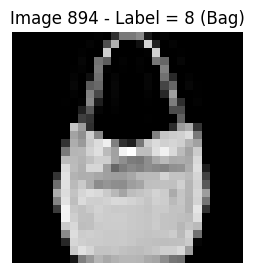

In [7]:
# Display sample
sample_index = 894
img, label = training_data[sample_index]
plt.figure(figsize = (3, 3))
plt.axis("off")
plt.imshow(img.squeeze(), cmap="gray")
plt.title("Image {} - Label = {} ({})".format(sample_index, \
                                              label, \
                                              labels_map[label]))
plt.show()

### Using a custom Dataset

Most of the time, when demonstrating concepts, we will rely on a "simple" dataset, available in the PyTorch library. In practice, however, you will often play with a custom dataset, fitting your project needs.

Most datasets can be provided by your future employer, or can be found on dataset search engines, such as Kaggle, Google Dataset Search, etc.

Today, we will play with a simplified version of the Ames Housing Dataset, which can be found online, here: https://www.kaggle.com/datasets/prevek18/ames-housing-dataset?resource=download

Compiled by Dean De Cock for use in data science education, this dataset includes a variety of features for approximately 2,800 houses in Ames, Iowa, including the size of the house (in square feet), the number of bedrooms and bathrooms, the year the house was built, and more. It also includes the sale price for each house. The Ames Housing Dataset is a popular choice for machine learning projects, and it has been used to build models for predicting house prices based on various features.

It consists of an Excel file (AmesHousing.xlsx) stored in the ./ames/ folder. The original dataset can be found in the  AmesHousing.csv file, but we have simplified it by removing some of its features. The features we are interested in are:

- Lot Area: The area of the lot in square feet.
- Overall Qual: A rating of the overall material and finish of the house (1-10).
- Overall Cond: A rating of the overall condition of the house (1-10).
- Year Built: The year the house was built.
- Year Remod/Add: The year the house was remodeled or had an addition added.
- Total Bsmt SF: The total surface of the basement, in square feet.
- 1st Flr SF: The first floor surface, in square feet.
- 2nd Flr SF: The second floor surface, in square feet.
- Gr Liv Area: The above grade (ground) living area, in square feet.
- Full Bath: The number of full bathrooms.
- Half Bath: The number of half bathrooms.
- Bedroom AbvGr: The number of bedrooms.
- Kitchen AbvGr: The number of kitchens.
- TotRms AbvGrd: The total number of rooms (does not include bathrooms).
- Garage Area: The size of the garage, in square feet.
- Yr Sold: The year the property was sold.

These 16 features will be used as inputs, and the output will consist of just one parameter, in the final column, which is:

- SalePrice: The sale price, in dollars.

The dataset contains 2928 entries, and can be displayed below using pandas.

In [8]:
# Load dataset using pandas, and showing the first five entries
ames_dataset = pd.read_excel("./ames/AmesHousing.xlsx")
print(ames_dataset.head(5))

   Lot Area  Overall Qual  Overall Cond  Year Built  Year Remod/Add  \
0     31770             6             5        1960            1960   
1     11622             5             6        1961            1961   
2     14267             6             6        1958            1958   
3     11160             7             5        1968            1968   
4     13830             5             5        1997            1998   

   Total Bsmt SF  1st Flr SF  2nd Flr SF  Gr Liv Area  Full Bath  Half Bath  \
0           1080        1656           0         1656          1          0   
1            882         896           0          896          1          0   
2           1329        1329           0         1329          1          1   
3           2110        2110           0         2110          2          1   
4            928         928         701         1629          2          1   

   Bedroom AbvGr  Kitchen AbvGr  TotRms AbvGrd  Garage Area  Yr Sold  \
0              3          

### Creating a custom Dataset class for PyTorch

To write a custom dataset class in PyTorch, you should do the following:

- Create a class that subclasses torch.utils.data.Dataset.
- Define a constructor (**\_\_init\_\_**) that takes in the required arguments, and stores them as member variables.
- Define a method **\_\_getitem\_\_** that takes an index as input and returns the data and label at that index as an array. This will allow to use the square bracket notation on our dataset object (like we would with lists).
- Define a method **\_\_len\_\_** that returns the length of the dataset (i.e., the number of examples it contains).

In the case of our custom dataset, we can do it as shown below.

In [9]:
class AmesHousingDataset(torch.utils.data.Dataset):
    
    #The init method will simply initialize attributes, which consist
    # of the details related to the dataset.
    def __init__(self, file_path = "./ames/AmesHousing.xlsx"):
        # Whole data as a pandas array
        self.data = pd.read_excel(file_path)
        self.dataset_length = len(self.data) #2928
        
        # Extract inputs
        self.input_fetaures_number = 16
        self.input_features = self.data.iloc[:, :16]
        
        # Extract outputs
        self.output_fetaures_number = 1
        self.output_feature = self.data.iloc[:, 16]
    
    # The getitem method returns the sample with given index
    # x will consist of the 16 input features for the given sample,
    # whereas y will consist of the 1 output feature for the given sample.
    def __getitem__(self, index):
        # Fetch inputs
        x = self.input_features.iloc[index].values
        # Fetch outputs
        y = self.output_feature.iloc[index]
        return x, y
    
    # Finally, the len special method should return the number of samples,
    # in the dataset. We could use self.dataset_length, but it is more
    # modular to use len(self.data).
    def __len__(self):
        return len(self.data)

We can then try it below.

In [10]:
# Instantiate the dataset
ames_dataset = AmesHousingDataset('./ames/AmesHousing.xlsx')

# Fetch sample with index 286
sample_input, sample_output = ames_dataset[286]
# Input is a (16,) numpy array, with the following values
print(type(sample_input), sample_input.shape)
print(sample_input)
# Output is a single value, of type numpy int64
print(type(sample_output), sample_output.shape)
print(sample_output)

<class 'numpy.ndarray'> (16,)
[6858    6    4 1915 1950  806  841  806 1647    1    1    4    1    6
  216 2010]
<class 'numpy.int64'> ()
128000


### Create a custom dataloader

Before we can feed this dataset object to Neural Networks, we need to supplement it with a Dataloader, that will shuffle the samples randomly and produce mini-batches of a given size. This Dataloader typically allows for stochastic mini-batches. The dataloader will also transform arrays into tensors.

We can then generate minibatches using the for loop shown below. Notice how this creates 92 (= 2928/32, rounded up) batches of 32 samples, with the exception of the last batch, that only contains 16 samples (= 2928 % 32).

In [11]:
# Instantiate the dataset
ames_dataset = AmesHousingDataset('./ames/AmesHousing.xlsx')

# Create a DataLoader for the dataset
ames_dataloader = torch.utils.data.DataLoader(ames_dataset, \
                                              batch_size = 32, \
                                              shuffle = True)

In [12]:
for batch_number, batch in enumerate(ames_dataloader):
    inputs, outputs = batch
    print("---")
    print("Batch number: ", batch_number)
    print(inputs.shape)
    print(outputs.shape)

---
Batch number:  0
torch.Size([32, 16])
torch.Size([32])
---
Batch number:  1
torch.Size([32, 16])
torch.Size([32])
---
Batch number:  2
torch.Size([32, 16])
torch.Size([32])
---
Batch number:  3
torch.Size([32, 16])
torch.Size([32])
---
Batch number:  4
torch.Size([32, 16])
torch.Size([32])
---
Batch number:  5
torch.Size([32, 16])
torch.Size([32])
---
Batch number:  6
torch.Size([32, 16])
torch.Size([32])
---
Batch number:  7
torch.Size([32, 16])
torch.Size([32])
---
Batch number:  8
torch.Size([32, 16])
torch.Size([32])
---
Batch number:  9
torch.Size([32, 16])
torch.Size([32])
---
Batch number:  10
torch.Size([32, 16])
torch.Size([32])
---
Batch number:  11
torch.Size([32, 16])
torch.Size([32])
---
Batch number:  12
torch.Size([32, 16])
torch.Size([32])
---
Batch number:  13
torch.Size([32, 16])
torch.Size([32])
---
Batch number:  14
torch.Size([32, 16])
torch.Size([32])
---
Batch number:  15
torch.Size([32, 16])
torch.Size([32])
---
Batch number:  16
torch.Size([32, 16])
torch.S

### What's next?

This concludes our PyTorch basics notebooks on how to implement custom Dataset and Dataloader objects.

In the next notebooks, we will investigate a different task, which will introduce more advanced concepts, that are variations of the current ones: Deep Neural Networks and Multi-class binary classification. We will investigate this in a guided project approach.